# Capstone NLP 

# Define Project Objectives

Natural disasters can have a significant impact on people's lives, and social media has become an important source of information during such events. 

In this project, 

we aim to build a machine learning model that can `classify` tweets as `disaster-related or not`, based on their `text content`. 

We will use Natural Language Processing (NLP) techniques to `preprocess` and `analyze` the text, and `train` several machine learning models to `predict` the classification of each tweet. 

This project will provide an opportunity to apply NLP and machine learning techniques to a real-world problem and gain experience in data analysis, modeling, and interpretation. 

Data: https://www.kaggle.com/competitions/nlp-getting-started/data


# Data Acquisition

Data Importing

In [1]:
import pandas as pd

import training data

In [2]:
train_data = pd.read_csv(r"train.csv")
train_data.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [3]:
train_data = train_data.loc[:, ['text', 'target']]
train_data.head()

,text,target
0,Our Deeds are the Reason of this #earthquake M...,1
1,Forest fire near La Ronge Sask. Canada,1
2,All residents asked to 'shelter in place' are ...,1
3,"13,000 people receive #wildfires evacuation or...",1
4,Just got sent this photo from Ruby #Alaska as ...,1


In [4]:
train_data.tail()

,text,target
7608,Two giant cranes holding a bridge collapse int...,1
7609,@aria_ahrary @TheTawniest The out of control w...,1
7610,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,Police investigating after an e-bike collided ...,1
7612,The Latest: More Homes Razed by Northern Calif...,1


# Data Exploration

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    7613 non-null   object
 1   target  7613 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 119.1+ KB


get `Number of tokens`

In [10]:
train_data['no_tokens'] = train_data['text'].str.split().map(lambda token: len(token)) 
train_data.sample(10)

,text,target,no_tokens
4429,@susanj357 @msnbc @allinwithchris it's like wa...,0,19
2113,Ted Cruz Bashes Obama Comparison GOP To Irania...,1,15
4546,@michaelgbaron how come scott rice doesn't get...,0,18
5270,Refugio oil spill may have been costlier bigge...,1,11
2909,No one told me you can drown yourself by drink...,0,13
5894,Watch This Airport Get Swallowed Up By A Sands...,1,14
4416,The Murderous Story Of AmericaÛªs First Hijac...,1,8
2756,@ssssnell yeah I agree but it's the shock fact...,0,22
1227,Witness video shows car explode behind burning...,1,17
1468,#iphone #twist Ultimate #preparedness library:...,0,13


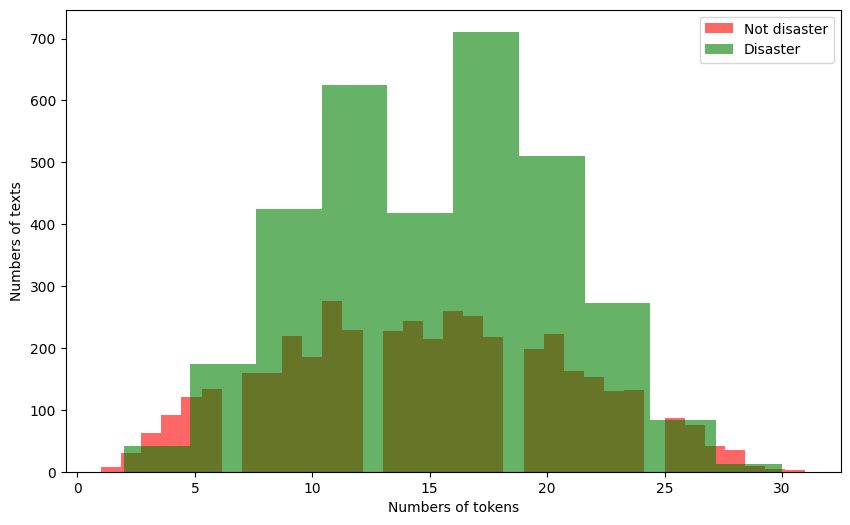

In [11]:
plt.figure(figsize=(10, 6)) 

train_data[train_data['target'] == 0]['no_tokens'].plot(bins=35, 
                                                kind='hist', 
                                                color='red', 
                                                label='Not disaster', 
                                                alpha=0.6)

train_data[train_data['target'] == 1]['no_tokens'].plot(kind='hist', 
                                                color='green', 
                                                label='Disaster', 
                                                alpha=0.6)

plt.legend(loc='upper right')
plt.xlabel("Numbers of tokens")
plt.ylabel("Numbers of texts")
plt.show()

The most distribution of `Not disaster` are range `14 to 16` tokens.

The most distribution of `Disaster` are range `12 to 20` tokens.

`Average token` length in a text

c:\Users\CENTER_ELRahama\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\CENTER_ELRahama\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\CENTER_ELRahama\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\CENTER_ELRahama\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py

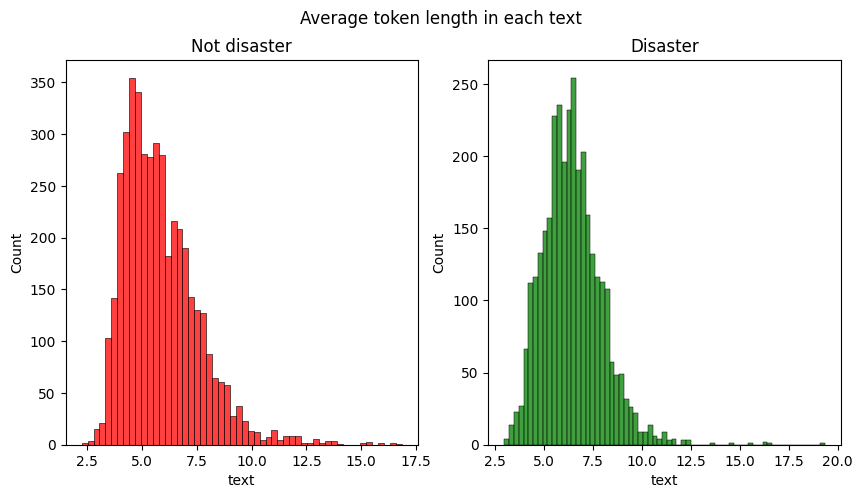

In [12]:
fig,(ax1, ax2)=plt.subplots(1,2,figsize=(10,5))

avg_tokens= train_data[train_data['target'] == 0]['text'].str.split().apply(lambda token : [len(char) for char in token]).map(lambda x: np.mean(x))
sns.histplot(avg_tokens, ax=ax1, color='red')
ax1.set_title('Not disaster')

avg_tokens= train_data[train_data['target'] == 1]['text'].str.split().apply(lambda token : [len(char) for char in token]).map(lambda x: np.mean(x))
sns.histplot(avg_tokens, ax=ax2, color='green')
ax2.set_title('Disaster')

fig.suptitle('Average token length in each text')
plt.show()

The most distribution of `Not disaster` are average `4 to 8` text.

The most distribution of `Disaster` are average `12 to 20` text.

# Data Preparation

In [13]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
import re

Missing data

In [14]:
train_data.isnull().sum()

text         0
target       0
no_tokens    0
dtype: int64

Noise Removal

In [15]:
stop_words = stopwords.words('english')
print(stop_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [16]:
len(stop_words)

179

Excluding some useful words from stop words list|

In [17]:
excluding= ['againts','no' ,'not', 'don', "don't", 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', 
            "didn't",'doesn', "doesn't", 'hadn', "hadn't", 'has', "hasn't", 'haven', "haven't", 'isn', 
            "isn't", 'might', "mightn't", 'mustn', "mustn't", 'needn', "needn't", 'shouldn', "shouldn't", 
            'wasn', "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't"]

stop_words= [word for word in stop_words if word not in excluding]
len(stop_words)

143

word normalization

In [18]:
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

In [19]:
def preprocessing_data(texts):
    cleaned_texts = []  

    for sent in texts: 
        filtered_sent = []
        sent_no_links = re.sub(r'http[s]?://[^\s]+', '', sent) 
        tokens = word_tokenize(sent_no_links.lower())
        
        for token in tokens:
            token = re.sub(r'\W', '', token)
            if (not token.isnumeric()) and (len(token) > 2) and (token not in stop_words):
                filtered_sent.append(lemmatizer.lemmatize(stemmer.stem(token)))
                
        text = " ".join(filtered_sent)
        cleaned_texts.append(text)
    
    return cleaned_texts

In [20]:
train_data['text'].values

array(['Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all',
       'Forest fire near La Ronge Sask. Canada',
       "All residents asked to 'shelter in place' are being notified by officers. No other evacuation or shelter in place orders are expected",
       ...,
       'M1.94 [01:04 UTC]?5km S of Volcano Hawaii. http://t.co/zDtoyd8EbJ',
       'Police investigating after an e-bike collided with a car in Little Portugal. E-bike rider suffered serious non-life threatening injuries.',
       'The Latest: More Homes Razed by Northern California Wildfire - ABC News http://t.co/YmY4rSkQ3d'],
      dtype=object)

In [21]:
train_data['clean_text'] = preprocessing_data(train_data['text'].values)
train_data.head()

,text,target,no_tokens,clean_text
0,Our Deeds are the Reason of this #earthquake M...,1,13,deed reason earthquak may allah forgiv
1,Forest fire near La Ronge Sask. Canada,1,7,forest fire near rong sask canada
2,All residents asked to 'shelter in place' are ...,1,22,resid ask shelter place notifi offic evacu she...
3,"13,000 people receive #wildfires evacuation or...",1,8,peopl receiv wildfir evacu order california
4,Just got sent this photo from Ruby #Alaska as ...,1,16,got sent photo rubi alaska smoke wildfir pour ...


In [22]:
train_data['text'].iloc[4187]

'Road Hazard @ CASCADE RD SW / CHILDRESS DR SW http://t.co/DilyvRoWyJ'

In [23]:
train_data['clean_text'].iloc[4187]

'road hazard cascad childress'

In [24]:
train_data['text'].iloc[4945]

"Deepak Chopra's EPIC Twitter Meltdown http://t.co/ethgAGPy5G"

In [25]:
train_data['clean_text'].iloc[4945]

'deepak chopra epic twitter meltdown'

imbalance target 

In [31]:
train_data['target'].value_counts()

target
0    4342
1    3271
Name: count, dtype: int64

In [32]:
train_data['target'].value_counts(normalize=True)

target
0    0.57034
1    0.42966
Name: proportion, dtype: float64

plot imbalance between classes

c:\Users\CENTER_ELRahama\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\CENTER_ELRahama\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\CENTER_ELRahama\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


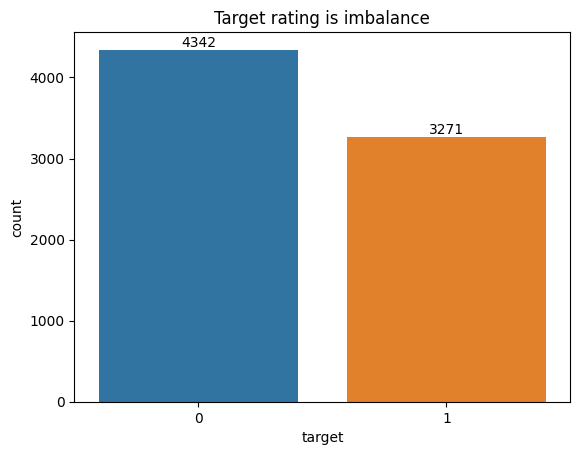

In [33]:
ax= sns.countplot(x=train_data['target'],
                  data=train_data)

for p in ax.patches:
    x= p.get_bbox().get_points()[:,0] 
    y= p.get_bbox().get_points()[1,1]
    ax.annotate(f'{y:.0f}', (x.mean(), y), ha='center',va='bottom')
    
plt.title("Target rating is imbalance")
plt.show()

handel imbalanced classes

In [34]:
from sklearn.utils import shuffle, resample

In [35]:
df2 = train_data

not_disaster_data = train_data[train_data['target'] == 0]
disaster_data = train_data[train_data['target'] == 1]
disaster_data = resample(disaster_data, replace=True, n_samples=len(not_disaster_data))

df2 = pd.concat([not_disaster_data, disaster_data], axis=0)

balanced_train_data = shuffle(df2)

print("Number of rows after upsampling: \nNot Disaster Data:", len(balanced_train_data[balanced_train_data["target"] == 0]), 
      "\nDisaster Data:", len(balanced_train_data[balanced_train_data["target"] == 1]))

Number of rows after upsampling: 
Not Disaster Data: 4342 
Disaster Data: 4342


c:\Users\CENTER_ELRahama\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\CENTER_ELRahama\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\CENTER_ELRahama\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


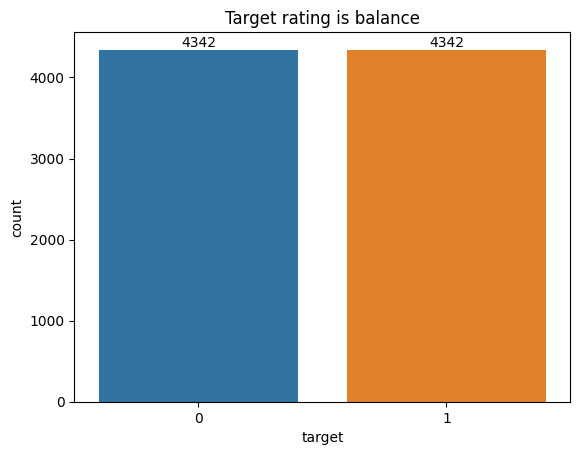

In [36]:
ax= sns.countplot(x=balanced_train_data['target'],
                  data=balanced_train_data)

for p in ax.patches:
    x= p.get_bbox().get_points()[:,0] 
    y= p.get_bbox().get_points()[1,1]
    ax.annotate(f'{y:.0f}', (x.mean(), y), ha='center',va='bottom')
    
plt.title("Target rating is balance")
plt.show()

split data

In [37]:
from sklearn.model_selection import train_test_split

In [38]:
balanced_train_data.head()

,text,target,no_tokens,clean_text
1773,Motorcyclist bicyclist injured in Denver colli...,1,9,motorcyclist bicyclist injur denver collis bro...
5365,Is it time to panic now? https://t.co/OrxDQfz0J0,0,7,time panic
3357,Rocky fire in Northern California swells to 60...,1,17,rocki fire northern california swell acr evacu...
1425,Afghanistan: sharp rise in women and children ...,1,14,afghanistan sharp rise woman child casualti fi...
4980,@YMcglaun THANK YOU FOR UNDERSTANDING THE GOV...,0,25,ymcglaun thank understand gov tell what realli...


In [39]:
X_train, X_test, y_train, y_test = train_test_split(balanced_train_data['clean_text'], balanced_train_data['target'], test_size=0.2, random_state=7)

In [40]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(6947,)
(1737,)
(6947,)
(1737,)


# Build Pipline

In [41]:
from sklearn.pipeline import Pipeline

apply vectorization

In [42]:
from sklearn.feature_extraction.text import TfidfVectorizer


apply model

In [43]:
from sklearn.naive_bayes import MultinomialNB


In [44]:
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('nb', MultinomialNB())
])

apply grid search for hyperparameters

In [45]:
from sklearn.model_selection import GridSearchCV

define new hyperparameters 

In [46]:
params = {
    'tfidf__ngram_range': [(1,1), (1,2)],
    'tfidf__max_df': [0.5, 0.75, 1.0],
    'tfidf__min_df': [1, 2, 5],
    'nb__alpha': [0.1, 0.5, 1.0],
}

get the best hyperparameters

In [47]:
grid_search = GridSearchCV(estimator= pipeline, 
                           param_grid= params, 
                           cv= 5)

fit grid search 

In [48]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('tfidf', TfidfVectorizer()),
                                       ('nb', MultinomialNB())]),
             param_grid={'nb__alpha': [0.1, 0.5, 1.0],
                         'tfidf__max_df': [0.5, 0.75, 1.0],
                         'tfidf__min_df': [1, 2, 5],
                         'tfidf__ngram_range': [(1, 1), (1, 2)]})

params for each iteration

In [49]:
pd.DataFrame(grid_search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_nb__alpha,param_tfidf__max_df,param_tfidf__min_df,param_tfidf__ngram_range,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.218536,0.035599,0.052390,0.013631,0.1,0.5,1,"(1, 1)","{'nb__alpha': 0.1, 'tfidf__max_df': 0.5, 'tfid...",0.841007,0.832374,0.830094,0.828654,0.846652,0.835756,0.006932,10
1,0.399855,0.114722,0.056223,0.016060,0.1,0.5,1,"(1, 2)","{'nb__alpha': 0.1, 'tfidf__max_df': 0.5, 'tfid...",0.851799,0.846763,0.853132,0.838733,0.856012,0.849287,0.006067,1
2,0.095863,0.014379,0.029441,0.006061,0.1,0.5,2,"(1, 1)","{'nb__alpha': 0.1, 'tfidf__max_df': 0.5, 'tfid...",0.812950,0.825899,0.806335,0.804896,0.830814,0.816179,0.010424,31
3,0.248505,0.012611,0.051656,0.005496,0.1,0.5,2,"(1, 2)","{'nb__alpha': 0.1, 'tfidf__max_df': 0.5, 'tfid...",0.820144,0.821583,0.811375,0.820734,0.839453,0.822658,0.009171,22
4,0.133309,0.025721,0.036178,0.006854,0.1,0.5,5,"(1, 1)","{'nb__alpha': 0.1, 'tfidf__max_df': 0.5, 'tfid...",0.789928,0.799281,0.798416,0.784017,0.815695,0.797467,0.010716,52
5,0.268308,0.045762,0.068783,0.020021,0.1,0.5,5,"(1, 2)","{'nb__alpha': 0.1, 'tfidf__max_df': 0.5, 'tfid...",0.794245,0.800719,0.799856,0.783297,0.822894,0.800202,0.012935,37
6,0.178673,0.007898,0.045989,0.009958,0.1,0.75,1,"(1, 1)","{'nb__alpha': 0.1, 'tfidf__max_df': 0.75, 'tfi...",0.841007,0.832374,0.830094,0.828654,0.846652,0.835756,0.006932,10
7,0.691752,0.119520,0.102242,0.035517,0.1,0.75,1,"(1, 2)","{'nb__alpha': 0.1, 'tfidf__max_df': 0.75, 'tfi...",0.851799,0.846763,0.853132,0.838733,0.856012,0.849287,0.006067,1
8,0.195252,0.063218,0.046633,0.016392,0.1,0.75,2,"(1, 1)","{'nb__alpha': 0.1, 'tfidf__max_df': 0.75, 'tfi...",0.812950,0.825899,0.806335,0.804896,0.830814,0.816179,0.010424,31
9,0.318428,0.133164,0.047784,0.011179,0.1,0.75,2,"(1, 2)","{'nb__alpha': 0.1, 'tfidf__max_df': 0.75, 'tfi...",0.820144,0.821583,0.811375,0.820734,0.839453,0.822658,0.009171,22


best hyperparameters

In [50]:
best_params = grid_search.best_params_
best_params

{'nb__alpha': 0.1,
 'tfidf__max_df': 0.5,
 'tfidf__min_df': 1,
 'tfidf__ngram_range': (1, 2)}

best score

In [51]:
best_score = grid_search.best_score_*100
best_score

84.92874641971089

# Mode Training

In [52]:
from sklearn.naive_bayes import MultinomialNB

In [53]:
best_pipeline = Pipeline([
    (
        'tfidf', TfidfVectorizer(ngram_range=grid_search.best_params_['tfidf__ngram_range'],
                              max_df=grid_search.best_params_['tfidf__max_df'],
                              min_df=grid_search.best_params_['tfidf__min_df'])
     ),

    (
        'nb', MultinomialNB(alpha=grid_search.best_params_['nb__alpha'])
     )

])

In [54]:
best_pipeline.fit(X_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer(max_df=0.5, ngram_range=(1, 2))),
                ('nb', MultinomialNB(alpha=0.1))])

# Model Evaluation

In [55]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [56]:
y_pred = best_pipeline.predict(X_test)

accuracy score

In [57]:
accuracy = accuracy_score(y_test, y_pred)
accuracy*100

85.54979850316637

classification report

In [58]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.81      0.85       864
           1       0.83      0.90      0.86       873

    accuracy                           0.86      1737
   macro avg       0.86      0.86      0.86      1737
weighted avg       0.86      0.86      0.86      1737



confusion matrix

In [59]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[704, 160],
       [ 91, 782]], dtype=int64)

plot heatmap for confusion matrix

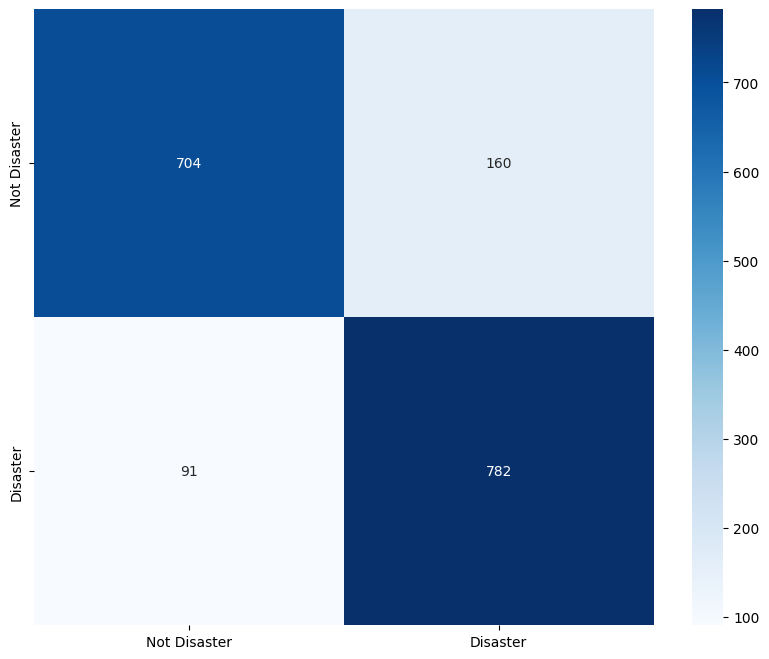

In [60]:
plt.figure(figsize=(10,8))
labels = ['Not Disaster', 'Disaster']
sns.heatmap(cm,
            xticklabels=labels, 
            yticklabels=labels,
            annot= True,
            cmap= 'Blues',
            fmt= 'g')
plt.show()

# Save Model

In [61]:
import joblib

In [62]:
joblib.dump(best_pipeline, 'disaster_classifier_model.pkl')

['disaster_classifier_model.pkl']

# Load model for test new data

In [63]:
model = joblib.load('disaster_classifier_model.pkl')
model

Pipeline(steps=[('tfidf', TfidfVectorizer(max_df=0.5, ngram_range=(1, 2))),
                ('nb', MultinomialNB(alpha=0.1))])

In [64]:
test_data = pd.read_csv(r'test.csv')
test_data.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [65]:
test_data = test_data.loc[:, ['text']]
test_data.head()

,text
0,Just happened a terrible car crash
1,"Heard about #earthquake is different cities, s..."
2,"there is a forest fire at spot pond, geese are..."
3,Apocalypse lighting. #Spokane #wildfires
4,Typhoon Soudelor kills 28 in China and Taiwan


In [66]:
test_data.tail()

,text
3258,EARTHQUAKE SAFETY LOS ANGELES ÛÒ SAFETY FASTE...
3259,Storm in RI worse than last hurricane. My city...
3260,Green Line derailment in Chicago http://t.co/U...
3261,MEG issues Hazardous Weather Outlook (HWO) htt...
3262,#CityofCalgary has activated its Municipal Eme...


In [67]:
test_data['clean_text'] = preprocessing_data(test_data['text'].values)
test_data.head()

,text,clean_text
0,Just happened a terrible car crash,happen terribl car crash
1,"Heard about #earthquake is different cities, s...",heard earthquak differ citi stay safe everyon
2,"there is a forest fire at spot pond, geese are...",forest fire spot pond gee flee across street n...
3,Apocalypse lighting. #Spokane #wildfires,apocalyps light spokan wildfir
4,Typhoon Soudelor kills 28 in China and Taiwan,typhoon soudelor kill china taiwan


In [68]:
preds = model.predict(test_data['clean_text'])
preds

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [69]:
test_data['target'] = preds
test_data.head()

,text,clean_text,target
0,Just happened a terrible car crash,happen terribl car crash,1
1,"Heard about #earthquake is different cities, s...",heard earthquak differ citi stay safe everyon,1
2,"there is a forest fire at spot pond, geese are...",forest fire spot pond gee flee across street n...,1
3,Apocalypse lighting. #Spokane #wildfires,apocalyps light spokan wildfir,1
4,Typhoon Soudelor kills 28 in China and Taiwan,typhoon soudelor kill china taiwan,1
